<a href="https://colab.research.google.com/github/Siddhant254/Shoppin-Project/blob/main/Auto_Encoder_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Reshape
from tensorflow.keras.datasets import cifar100
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar100.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape for the autoencoder
x_train = x_train.reshape((-1, 32, 32, 3))
x_test = x_test.reshape((-1, 32, 32, 3))


In [20]:
# Encoder
input_img = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_4 (UpSampling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_5 (UpSampling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 32, 32, 3)           │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,651 (295.51 KB)

 Trainable params: 75,651 (295.51 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Train autoencoder
history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)


Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 0.0282 - val_loss: 0.0072
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.0067 - val_loss: 0.0056
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0054 - val_loss: 0.0049
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0048 - val_loss: 0.0045
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0042 - val_loss: 0.0051
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 9/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0036 - val_loss: 0.0038
Epoch 10/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 11/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 12/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 

In [22]:
# Encoder model
encoder = Model(input_img, encoded)

# Flatten latent space for easy similarity comparison
flattened_input = Input(shape=(8, 8, 64))
flattened_output = Flatten()(flattened_input)
feature_extractor = Model(flattened_input, flattened_output)

# Full feature extraction pipeline
feature_model = Model(encoder.input, feature_extractor(encoder.output))

# Extract features from the dataset
x_test_features = feature_model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [23]:
def find_similar_images(query_image, features, k=5):
    query_features = feature_model.predict(query_image.reshape(1, 32, 32, 3))
    similarities = cosine_similarity(query_features, features).flatten()
    top_k_indices = np.argsort(similarities)[-k:][::-1]
    return top_k_indices, similarities[top_k_indices]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


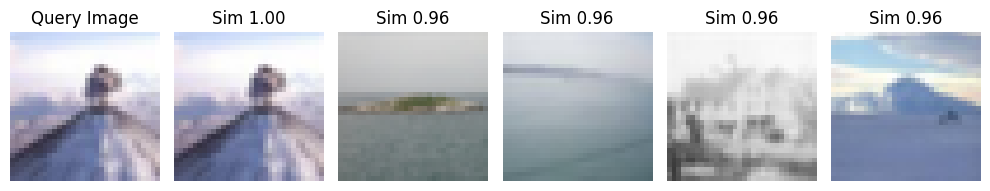

In [24]:
# Select a query image
query_index = 0
query_image = x_test[query_index]

# Find top-5 similar images
indices, scores = find_similar_images(query_image, x_test_features, k=5)

# Plot the query image and similar results
plt.figure(figsize=(10, 5))
plt.subplot(1, 6, 1)
plt.imshow(query_image)
plt.title("Query Image")
plt.axis("off")

for i, idx in enumerate(indices):
    plt.subplot(1, 6, i + 2)
    plt.imshow(x_test[idx])
    plt.title(f"Sim {scores[i]:.2f}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [12]:
!pip install faiss-cpu



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 49.7 MB/s eta 0:00:00


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


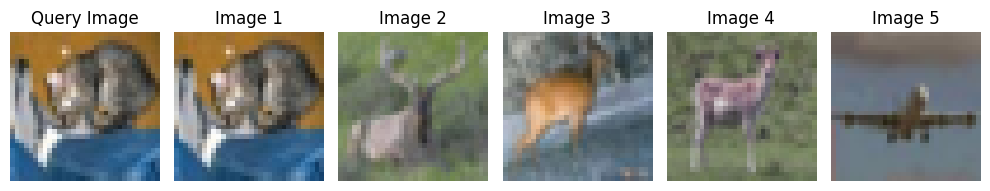

In [14]:
import faiss

# Convert features to float32 (required by FAISS)
x_test_features = np.array(x_test_features, dtype='float32')

# Create FAISS index
index = faiss.IndexFlatL2(x_test_features.shape[1])
index.add(x_test_features)

# Compute features for the query image
query_features = feature_model.predict(query_image.reshape(1, 32, 32, 3)).astype("float32")

# Perform similarity search
_, faiss_indices = index.search(query_features, k=5)

# Visualize the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 6, 1)
plt.imshow(query_image)
plt.title("Query Image")
plt.axis("off")

for i, idx in enumerate(faiss_indices[0]):
    plt.subplot(1, 6, i + 2)
    plt.imshow(x_test[idx])
    plt.title(f"Image {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()

